# WASP-39b NIRSpec GP analysis

**Author:** Hannu Parviainen </br>
**Edited:** 2025-06-17 </br>
**ExoIris version:** 0.17 

This notebook carries out an ExoIris transmission spectroscopy analysis for the JWST NIRSpec observations of WASP-39b reduced by [Carter et al. (2024)](https://www.nature.com/articles/s41550-024-02292-x). The original reduction and analysis of the observations were presented in [Alderson et al. (2023)](https://www.nature.com/articles/s41586-022-05591-3).

**Note:** This notebook assumes you have already read the basic [ExoIris tutorials](https://exoiris.readthedocs.io/en/latest/examples/index.html).

In [1]:
%run ../setup_multiprocessing.py

In [8]:
from multiprocessing import Pool

import xarray as xa

from matplotlib.pyplot import subplots, setp, rc
from astropy.time import Time
from exoiris import ExoIris, load_model

rc('figure', figsize=(13, 4))

## Load the white noise analysis and rename it

In [9]:
ts = load_model('WASP-39b-NIRSpec-wn.fits', name="WASP-39b-NIRSpec-gp")

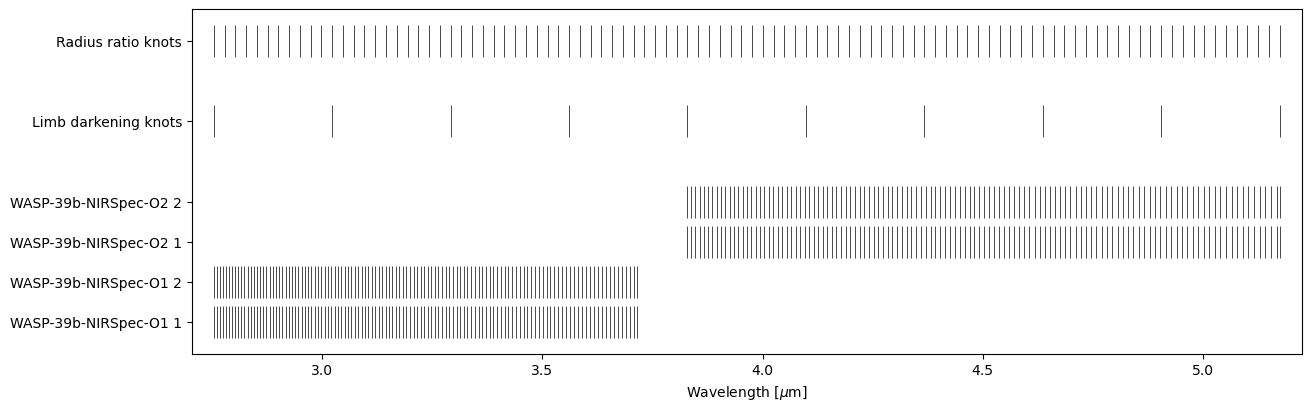

In [10]:
ts.plot_setup();

In [5]:
ts.set_noise_model('fixed_gp')

In [6]:
ts.set_prior('sigma_m_00', 'NP', 1.0, 0.001)
ts.set_prior('sigma_m_01', 'NP', 1.0, 0.001)

In [7]:
ts.fit_white()

In [8]:
ts.optimize_gp_hyperparameters(log10_rho_prior=(-1, 0.02))

[array([0.00012688, 0.10011701]),
 array([0.00013035, 0.09867925]),
 array([0.00015112, 0.09983664]),
 array([0.00015578, 0.1000366 ])]

In [9]:
ts.save(overwrite=True)

## Fit the transmission spectroscopy

In [ ]:
def lnpostf(pv):
    return ts.lnposterior(pv)

pool = Pool(8)

In [11]:
pvp0 = ts.create_initial_population(300, 'mcmc')

In [12]:
ts.reset()

Global optimisation:   0%|          | 0/2500 [00:00<?, ?it/s]

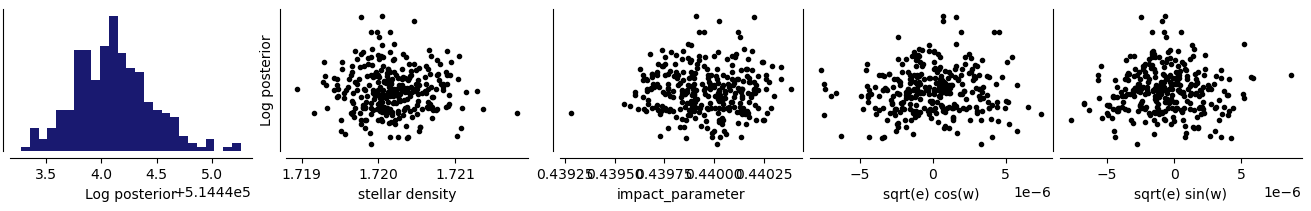

In [13]:
ts.fit(niter=2500, npop=300, pool=pool, lnpost=lnpostf, initial_population=pvp0)

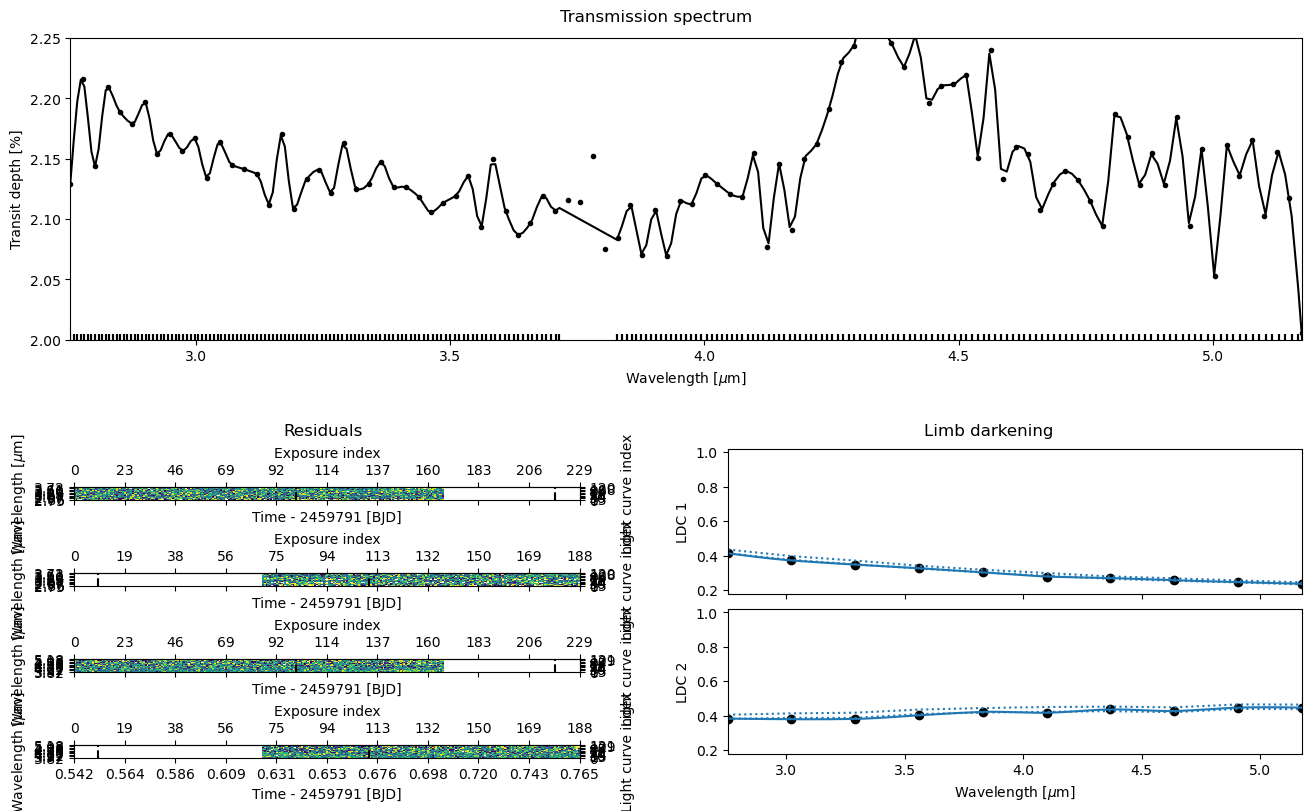

In [14]:
ts.plot_fit(result='fit', figsize=(13, 8), 
            res_args=dict(pmin=5, pmax=95),
            trs_args=dict(xscale='linear', ylim=(2.0, 2.3)));

In [15]:
ts.save(overwrite=True)

## Sample the posterior

In [19]:
ts.sample(1000, thin=100, repeats=6, pool=pool, lnpost=lnpostf)

MCMC sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Run 1/3:   0%|          | 0/1000 [00:00<?, ?it/s]

Run 2/3:   0%|          | 0/1000 [00:00<?, ?it/s]

Run 3/3:   0%|          | 0/1000 [00:00<?, ?it/s]

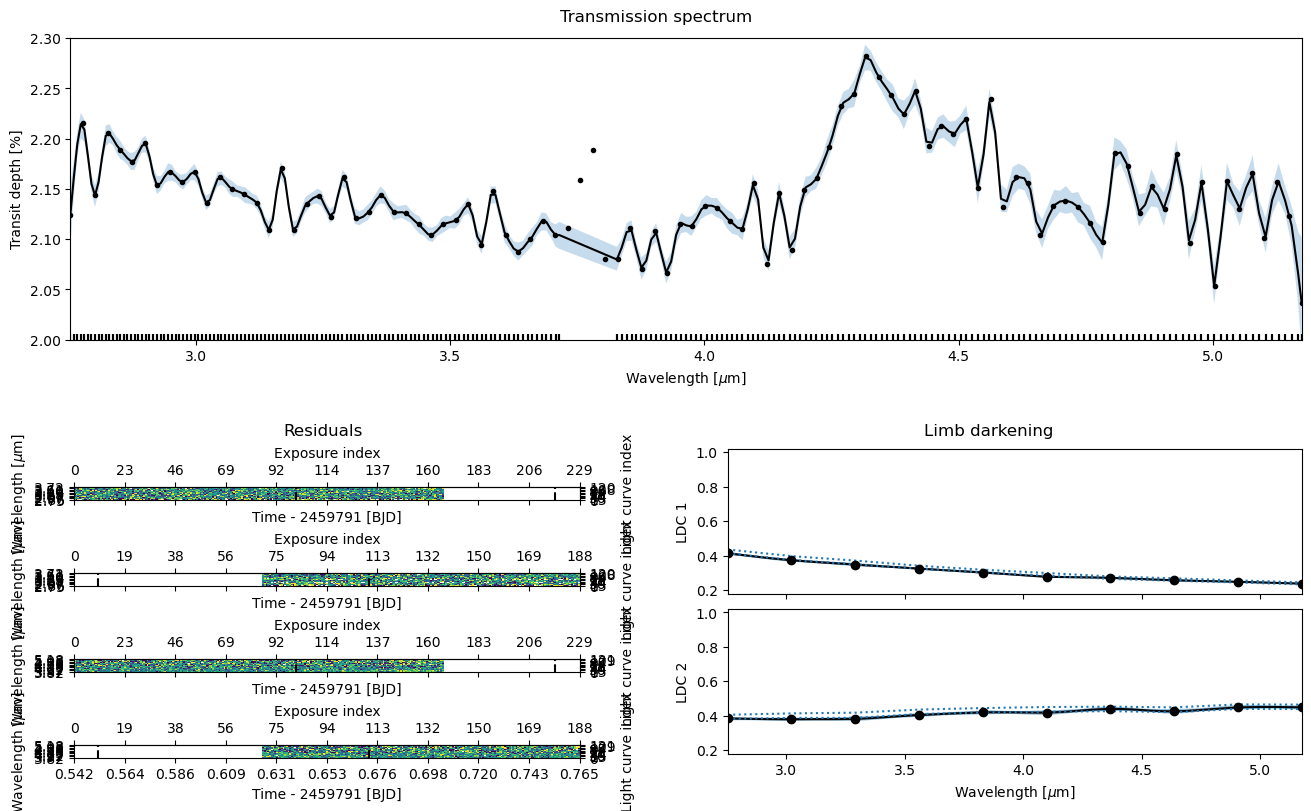

In [20]:
ts.plot_fit(result='mcmc', figsize=(13, 8), 
            res_args=dict(pmin=5, pmax=95),
            trs_args=dict(xscale='linear', ylim=(2.0, 2.3)));

In [ ]:
ts.save()

In [ ]:
pool.close()

---

<center>&copy;2025 Hannu Parviainen</center>